**Chapter10**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 7

In [2]:
usarrests = '../data/USArrests.csv'
usarrests = pd.read_csv(usarrests, index_col=0)
usarrests.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [11]:
from sklearn.preprocessing import scale
X = usarrests[['Murder','Assault','UrbanPop','Rape']]
X_scaled = scale(X)
print(X_scaled.mean(axis=0))
print(X_scaled.std(axis=0))
df = pd.DataFrame({
    'Murder_scaled':X_scaled[:,0],
    'Assault_scaled':X_scaled[:,1],
    'UrbanPop_scaled':X_scaled[:,2],
    'Rape_scaled':X_scaled[:,3]
})
df = df.T
df.head()

[ -7.10542736e-17   1.38777878e-16  -4.39648318e-16   8.59312621e-16]
[ 1.  1.  1.  1.]


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
Assault_scaled,0.790787,1.118060,1.493817,0.233212,1.275635,0.402909,-0.736484,0.815030,1.990786,0.487757,...,-1.027393,0.208970,0.366545,-0.615272,-1.487999,-0.178909,-0.312242,-1.087999,-1.427393,-0.118303
Murder_scaled,1.255179,0.513019,0.072361,0.234708,0.281093,0.025976,-1.040880,-0.437875,1.765415,2.229265,...,-0.924918,1.255179,1.139217,-1.064073,-1.295998,0.165131,-0.878533,-0.484260,-1.203228,-0.229142
Rape_scaled,-0.003451,2.509424,1.053466,-0.186794,2.088814,1.883901,-1.092723,-0.585834,1.150530,0.492653,...,-0.909380,0.611287,0.460298,0.179892,-1.081938,-0.057376,0.535792,-1.286851,-1.125078,-0.607404
UrbanPop_scaled,-0.526195,-1.224067,1.009122,-1.084492,1.776781,0.869548,0.799761,0.450825,1.009122,-0.386621,...,-1.433428,-0.456408,1.009122,1.009122,-2.340661,-0.177259,0.520612,-1.852151,0.032102,-0.386621


In [14]:
rij = df.corr()
rij = 1-rij

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.000000,0.713831,1.446595,0.087742,1.865922,1.687231,1.713587,1.142818,0.104920,0.116252,...,0.297015,0.204103,0.935808,1.993661,0.404473,0.344547,1.956846,0.038404,1.793068,0.343285
1,0.713831,0.000000,0.830725,0.367279,0.813713,0.515556,1.861787,1.478874,0.786103,0.736703,...,0.138851,0.462862,1.698576,1.391660,0.083333,0.815220,0.998302,0.615247,1.776892,1.327709
2,1.446595,0.830725,0.000000,1.176655,0.294902,0.598381,0.775958,0.341154,1.040993,1.783970,...,1.249100,1.685184,1.814860,0.599214,1.189801,1.927490,0.448265,1.603402,0.995020,1.016712
3,0.087742,0.367279,1.176655,0.000000,1.586313,1.370925,1.898642,1.192026,0.142143,0.251176,...,0.114854,0.216121,1.318600,1.951209,0.180566,0.502613,1.755826,0.111267,1.972967,0.540090
4,1.865922,0.813713,0.294902,1.586313,0.000000,0.114623,0.663160,0.897325,1.700981,1.859518,...,1.334248,1.651479,1.534541,0.192387,1.204604,1.728990,0.032273,1.833753,0.616535,1.700464


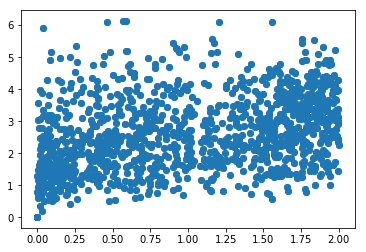

In [22]:
x = []
y = []
for i in range(50):
    for j in range(50):
        x.append(rij[i][j])
        instance_i = df[i].values
        instacne_j = df[j].values
        y.append(np.sqrt(np.sum((instance_i-instacne_j)*(instance_i-instacne_j))))
plt.scatter(x,y)

# 8

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
X = usarrests[['Murder','Assault','UrbanPop','Rape']].values
pca.fit(X)
print(pca.explained_variance_ratio_)

[  9.65534221e-01   2.78173366e-02   5.79953492e-03   8.48907879e-04]


# 9

In [27]:
usarrests = '../data/USArrests.csv'
usarrests = pd.read_csv(usarrests, index_col=0)
usarrests.head()
X = usarrests[['Murder','Assault','UrbanPop','Rape']]
y = usarrests.index.values

## 9(a)

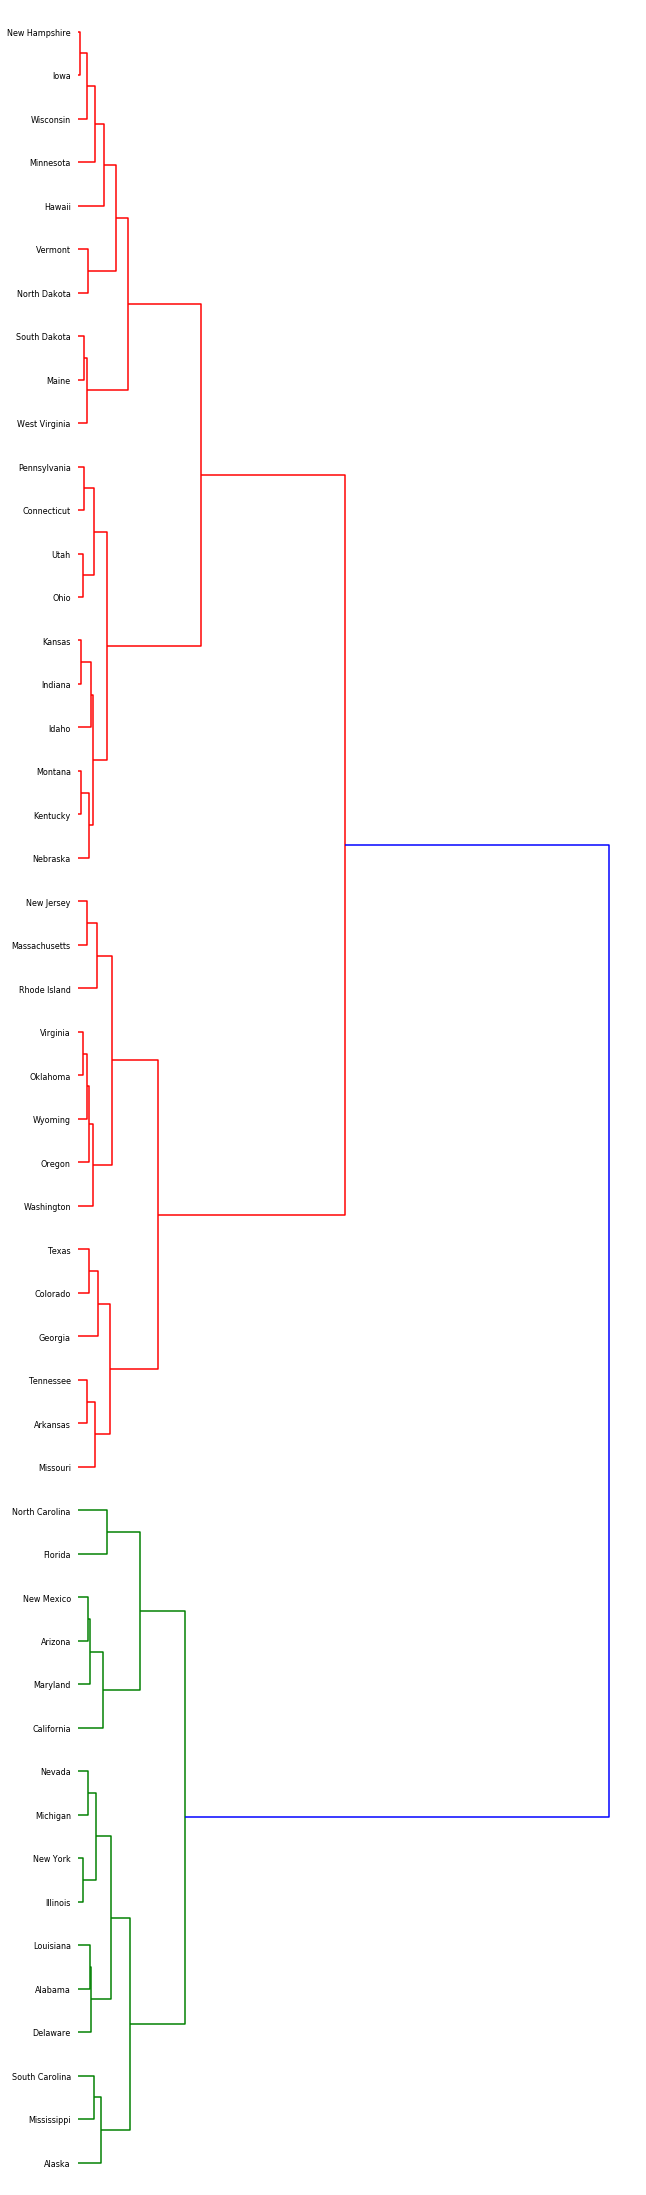

In [29]:
import scipy.cluster.hierarchy as sch
Y = sch.linkage(X, method='ward')
_, ax = plt.subplots(figsize=(10, 40))
Z = sch.dendrogram(Y, orientation='right')
idx = Z['leaves']
ax.set_xticks([])
ax.set_yticklabels(y[idx])
ax.set_frame_on(False)
plt.show()

## 9(b)

In [32]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3)
cluster.fit(X)
labels = cluster.labels_
for label, state in zip(labels, y):
    print(label,':',state)

1 : Alabama
1 : Alaska
1 : Arizona
2 : Arkansas
1 : California
2 : Colorado
0 : Connecticut
1 : Delaware
1 : Florida
2 : Georgia
0 : Hawaii
0 : Idaho
1 : Illinois
0 : Indiana
0 : Iowa
0 : Kansas
0 : Kentucky
1 : Louisiana
0 : Maine
1 : Maryland
2 : Massachusetts
1 : Michigan
0 : Minnesota
1 : Mississippi
2 : Missouri
0 : Montana
0 : Nebraska
1 : Nevada
0 : New Hampshire
2 : New Jersey
1 : New Mexico
1 : New York
1 : North Carolina
0 : North Dakota
0 : Ohio
2 : Oklahoma
2 : Oregon
0 : Pennsylvania
2 : Rhode Island
1 : South Carolina
0 : South Dakota
2 : Tennessee
2 : Texas
0 : Utah
0 : Vermont
2 : Virginia
2 : Washington
0 : West Virginia
0 : Wisconsin
2 : Wyoming


## 9(c)

In [35]:
from sklearn.preprocessing import scale
X_scale = scale(X)
cluster = AgglomerativeClustering(n_clusters=3)
cluster.fit(X_scale)
labels = cluster.labels_
for label, state in zip(labels, y):
    print(state,":", label)

Alabama : 0
Alaska : 0
Arizona : 0
Arkansas : 1
California : 0
Colorado : 0
Connecticut : 1
Delaware : 1
Florida : 0
Georgia : 0
Hawaii : 1
Idaho : 2
Illinois : 0
Indiana : 1
Iowa : 2
Kansas : 1
Kentucky : 1
Louisiana : 0
Maine : 2
Maryland : 0
Massachusetts : 1
Michigan : 0
Minnesota : 2
Mississippi : 0
Missouri : 1
Montana : 2
Nebraska : 2
Nevada : 0
New Hampshire : 2
New Jersey : 1
New Mexico : 0
New York : 0
North Carolina : 0
North Dakota : 2
Ohio : 1
Oklahoma : 1
Oregon : 1
Pennsylvania : 1
Rhode Island : 1
South Carolina : 0
South Dakota : 2
Tennessee : 0
Texas : 0
Utah : 1
Vermont : 2
Virginia : 1
Washington : 1
West Virginia : 2
Wisconsin : 2
Wyoming : 1


# 10

## 10(a)

In [55]:
X = np.random.normal(0,0.1,(60,50))
X[0:20,1] = 1
X[20:40,0] = 2
X[20:40,1] = 2
X[40:,0] = 1

## 10(b)

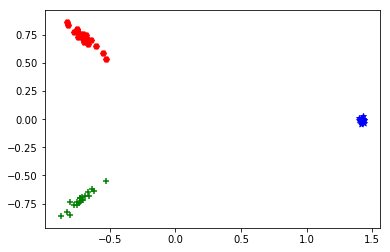

In [56]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X_trains = pca.transform(X)
plt.scatter(X_trains[:20,0], X_trains[:20,1], c='g', marker='+')
plt.scatter(X_trains[20:40,0], X_trains[20:40,1] , c='b', marker='*')
plt.scatter(X_trains[40:,0], X_trains[40:,1], c='r', marker='H')
plt.show()

## 10(c)

In [58]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
labels = kmeans.labels_
for idx, label in enumerate(labels):
    print('the '+str(idx+1)+'th sample label is ', label)

the 1th sample label is  0
the 2th sample label is  0
the 3th sample label is  0
the 4th sample label is  0
the 5th sample label is  0
the 6th sample label is  0
the 7th sample label is  0
the 8th sample label is  0
the 9th sample label is  0
the 10th sample label is  0
the 11th sample label is  0
the 12th sample label is  0
the 13th sample label is  0
the 14th sample label is  0
the 15th sample label is  0
the 16th sample label is  0
the 17th sample label is  0
the 18th sample label is  0
the 19th sample label is  0
the 20th sample label is  0
the 21th sample label is  1
the 22th sample label is  1
the 23th sample label is  1
the 24th sample label is  1
the 25th sample label is  1
the 26th sample label is  1
the 27th sample label is  1
the 28th sample label is  1
the 29th sample label is  1
the 30th sample label is  1
the 31th sample label is  1
the 32th sample label is  1
the 33th sample label is  1
the 34th sample label is  1
the 35th sample label is  1
the 36th sample label is  1
t

In [59]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
labels = kmeans.labels_
for idx, label in enumerate(labels):
    print('the '+str(idx+1)+'th sample label is ', label)

the 1th sample label is  0
the 2th sample label is  0
the 3th sample label is  0
the 4th sample label is  0
the 5th sample label is  0
the 6th sample label is  0
the 7th sample label is  0
the 8th sample label is  0
the 9th sample label is  0
the 10th sample label is  0
the 11th sample label is  0
the 12th sample label is  0
the 13th sample label is  0
the 14th sample label is  0
the 15th sample label is  0
the 16th sample label is  0
the 17th sample label is  0
the 18th sample label is  0
the 19th sample label is  0
the 20th sample label is  0
the 21th sample label is  1
the 22th sample label is  1
the 23th sample label is  1
the 24th sample label is  1
the 25th sample label is  1
the 26th sample label is  1
the 27th sample label is  1
the 28th sample label is  1
the 29th sample label is  1
the 30th sample label is  1
the 31th sample label is  1
the 32th sample label is  1
the 33th sample label is  1
the 34th sample label is  1
the 35th sample label is  1
the 36th sample label is  1
t

In [60]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
labels = kmeans.labels_
for idx, label in enumerate(labels):
    print('the '+str(idx+1)+'th sample label is ', label)

the 1th sample label is  0
the 2th sample label is  0
the 3th sample label is  0
the 4th sample label is  0
the 5th sample label is  0
the 6th sample label is  0
the 7th sample label is  0
the 8th sample label is  0
the 9th sample label is  0
the 10th sample label is  0
the 11th sample label is  0
the 12th sample label is  0
the 13th sample label is  0
the 14th sample label is  0
the 15th sample label is  0
the 16th sample label is  0
the 17th sample label is  0
the 18th sample label is  0
the 19th sample label is  0
the 20th sample label is  0
the 21th sample label is  1
the 22th sample label is  1
the 23th sample label is  1
the 24th sample label is  1
the 25th sample label is  1
the 26th sample label is  1
the 27th sample label is  1
the 28th sample label is  1
the 29th sample label is  1
the 30th sample label is  1
the 31th sample label is  1
the 32th sample label is  1
the 33th sample label is  1
the 34th sample label is  1
the 35th sample label is  1
the 36th sample label is  1
t

In [62]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_trains)
labels = kmeans.labels_
for idx, label in enumerate(labels):
    print('the '+str(idx+1)+'th sample label is ', label)

the 1th sample label is  2
the 2th sample label is  2
the 3th sample label is  2
the 4th sample label is  2
the 5th sample label is  2
the 6th sample label is  2
the 7th sample label is  2
the 8th sample label is  2
the 9th sample label is  2
the 10th sample label is  2
the 11th sample label is  2
the 12th sample label is  2
the 13th sample label is  2
the 14th sample label is  2
the 15th sample label is  2
the 16th sample label is  2
the 17th sample label is  2
the 18th sample label is  2
the 19th sample label is  2
the 20th sample label is  2
the 21th sample label is  1
the 22th sample label is  1
the 23th sample label is  1
the 24th sample label is  1
the 25th sample label is  1
the 26th sample label is  1
the 27th sample label is  1
the 28th sample label is  1
the 29th sample label is  1
the 30th sample label is  1
the 31th sample label is  1
the 32th sample label is  1
the 33th sample label is  1
the 34th sample label is  1
the 35th sample label is  1
the 36th sample label is  1
t

In [64]:
X_scaled = scale(X)
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)
for idx, label in enumerate(labels):
    print('the '+str(idx+1)+'th sample label is ', label)

the 1th sample label is  2
the 2th sample label is  2
the 3th sample label is  2
the 4th sample label is  2
the 5th sample label is  2
the 6th sample label is  2
the 7th sample label is  2
the 8th sample label is  2
the 9th sample label is  2
the 10th sample label is  2
the 11th sample label is  2
the 12th sample label is  2
the 13th sample label is  2
the 14th sample label is  2
the 15th sample label is  2
the 16th sample label is  2
the 17th sample label is  2
the 18th sample label is  2
the 19th sample label is  2
the 20th sample label is  2
the 21th sample label is  1
the 22th sample label is  1
the 23th sample label is  1
the 24th sample label is  1
the 25th sample label is  1
the 26th sample label is  1
the 27th sample label is  1
the 28th sample label is  1
the 29th sample label is  1
the 30th sample label is  1
the 31th sample label is  1
the 32th sample label is  1
the 33th sample label is  1
the 34th sample label is  1
the 35th sample label is  1
the 36th sample label is  1
t

# 11

## 11(a)

In [3]:
data_file_path = '../data/Ch10Ex11.csv'
data = pd.read_csv(data_file_path, header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.961933,0.441803,-0.975005,1.417504,0.818815,0.316294,-0.024967,-0.063966,0.031497,-0.350311,...,-0.509591,-0.216726,-0.055506,-0.484449,-0.521581,1.949135,1.324335,0.468147,1.061100,1.655970
1,-0.292526,-1.139267,0.195837,-1.281121,-0.251439,2.511997,-0.922206,0.059543,-1.409645,-0.656712,...,1.700708,0.007290,0.099062,0.563853,-0.257275,-0.581781,-0.169887,-0.542304,0.312939,-1.284377
2,0.258788,-0.972845,0.588486,-0.800258,-1.820398,-2.058924,-0.064764,1.592124,-0.173117,-0.121087,...,-0.615472,0.009999,0.945810,-0.318521,-0.117889,0.621366,-0.070764,0.401682,-0.016227,-0.526553
3,-1.152132,-2.213168,-0.861525,0.630925,0.951772,-1.165724,-0.391559,1.063619,-0.350009,-1.489058,...,-0.284277,0.198946,-0.091833,0.349628,-0.298910,1.513696,0.671185,0.010855,-1.043689,1.625275
4,0.195783,0.593306,0.282992,0.247147,1.978668,-0.871018,-0.989715,-1.032253,-1.109654,-0.385142,...,-0.692998,-0.845707,-0.177497,-0.166491,1.483155,-1.687946,-0.141430,0.200778,-0.675942,2.220611


## 11(b)

In [4]:
import scipy.cluster.hierarchy as sch
X = data.values
y = np.array(['recover']*1000)
y[20:980]='unknown'
y[980:]='disease'
Y = sch.linkage(X, method='ward')
_, ax = plt.subplots(figsize=(100, 400))
Z = sch.dendrogram(Y, orientation='right')
idx = Z['leaves']
ax.set_xticks([])
ax.set_yticklabels(y[idx])
ax.set_frame_on(False)
plt.show()